In [297]:
import numpy as np
import pandas as pd

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score

In [298]:
data = pd.read_csv('cars.csv')
data.head(2)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0


In [201]:
data.shape

(762091, 20)

In [202]:
# clean dataset, but we need to do data transformation
data.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [200]:
data['price'].describe()

count    7.620910e+05
mean     3.648898e+04
std      1.984183e+06
min      1.000000e+00
25%      1.958300e+04
50%      2.798900e+04
75%      3.948800e+04
max      1.000000e+09
Name: price, dtype: float64

## Data Cleaning

cleaned columns: 
- price
- mileage
- exterior_color
- interior_color
- transmission
- fuel_type
- year 
- mgp
- drivetrain

- created another column 'tank size'


In [203]:
data['price'].sort_values(ascending=False)

188113    1.000000e+09
108142    1.000000e+09
188260    1.000000e+09
224571    8.888889e+06
84358     4.999999e+06
              ...     
584638    2.590000e+02
5658      1.000000e+00
13850     1.000000e+00
735177    1.000000e+00
660696    1.000000e+00
Name: price, Length: 762091, dtype: float64

In [204]:
# clean outlier prices, our dataset contains prices of 1 dollor and 100,000,000. These outliers will skew our results by large. So we decided to remove them
data = data[(data["price"]<data["price"].max()) & (data["price"] > 1.0)]

In [205]:
# remove seller_name
# We believe that the seller name has no effect on the price of the vehicle
data = data.drop(columns=['seller_name'], axis = 1)

In [206]:
# there are many outlier rows.
# 1119067 miles can drive around the earth 46627 times!
data['mileage'].sort_values(ascending=False)[:20]

756847    1119067.0
76422      999999.0
511961     999999.0
494409     999999.0
617503     974302.0
319941     938032.0
522994     915383.0
136180     777698.0
669643     769938.0
229883     763474.0
302334     754680.0
157346     724500.0
481170     680094.0
4896       668131.0
169278     662110.0
121155     653132.0
456962     644736.0
298512     638693.0
220225     620637.0
531797     566517.0
Name: mileage, dtype: float64

In [207]:
# delete the outliers (according to the Interquantile Range Outlier Detection method, outliers lie at >= 98% percentile)
percentile_98 = data['mileage'].quantile(0.98)
data = data[data['mileage'] <= percentile_98]

In [208]:
# clean extrior color

# categorize common color types
data['exterior_color_cleaned'] = data['exterior_color']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blk.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*bl.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*charcoal.*', 'black', case=False, regex=True)

# colors of gray
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*steel.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metal.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metallic.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*platinum.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grye.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silvr.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gry.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Titanium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SILV.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*sil.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*slate.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*lunar.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Magnesium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Granite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SIVER.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SLIVER.*', 'gray', case=False, regex=True)

# colors of white
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whiite.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*wt.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whi.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Wh.*', 'white', case=False, regex=True)

# colors of red
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*cherry.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*burgundy.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*maroon.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*garnet.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*amber.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Pomegranate.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGUN.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*MAROOON.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGAN.*', 'red', case=False, regex=True)


#colors of blue
# data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pearl.*', 'pearl', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*night.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blu.*', 'blue', case=False, regex=True)

# colors of green
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Turquoise.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*olive.*', 'green', case=False, regex=True)


# colors of yellow 
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*yellow.*', 'yellow', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*YELLLO.*', 'yellow', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Citrus.*', 'orange', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)

# colors of gold
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*champagne.*', 'gold', case=False, regex=True)

# colors of purple
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*violet.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*plum.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*berry.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Grape.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Velvet.*', 'purple', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pink.*', 'pink', case=False, regex=True)

colors_keep_exterior = ['black', 'gray', 'white', 'red', 'blue', 'green', 'yellow', 'orange', 'beige', 'brown', 'gold', 'purple', 'pink']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].where(data['exterior_color'].isin(colors_keep_exterior), 'other')


In [209]:
data['exterior_color_cleaned']

0         other
1         other
2         other
3         other
4         other
          ...  
762086    other
762087    other
762088    other
762089    other
762090    other
Name: exterior_color_cleaned, Length: 746346, dtype: object

In [210]:
data['exterior_color_cleaned'].unique()

array(['other', 'black', 'white', 'gray', 'red', 'green', 'beige', 'gold',
       'yellow', 'orange', 'brown'], dtype=object)

In [211]:
# convert transmission into automatic or manual types  transmission (automatic, manual, other is either na value or invalid input)

automatic_kw = "Automatic|A/T|Dual Shift Mode|dual clutch|auto|TipTronic|cvt|Power Glide|ivt|dct|evt|continuously variable"
manual_kw = "Manual|M/T|richmond 5 Speed|PDK"
data["transmission_cleaned"] = 0
data["transmission"].fillna("na", inplace = True)
data.loc[data["transmission"].str.contains(automatic_kw,case=False),"transmission_cleaned"] = "Automatic"
data.loc[data["transmission"].str.contains(manual_kw ,case=False),"transmission_cleaned"] = "Manual"
data.loc[data["transmission_cleaned"] == 0,"transmission_cleaned"] = "Other"

In [212]:
# clean interior color

# colors of black
data['interior_color_cleaned']= data['interior_color'] 
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Charcoal.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*BLK.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*onyx.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*balck.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Smoke.*', 'black', case=False, regex=True)

# colors of red
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Burgundy.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Maroon.*', 'red', case=False, regex=True)

# colors of gray
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Platinum.*', 'gray', case=False, regex=True)

# colors of white
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ivory.*', 'white', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)

# colors of beige
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*biege.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Cream.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Camel.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*tan.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Quartz.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Mocha.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*stone.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*neutral.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*sand.*', 'beige', case=False, regex=True)

# colors of blue
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)

# colors of purple
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Orchid.*', 'purple', case=False, regex=True)

# colors of brown
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Taupe.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Caramel.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*walnut.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Nougat.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Peanut Butter.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Espresso.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*saddle.*', 'brown', case=False, regex=True)

# colors of orange
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)

# colors of gold
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Champagne.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Bronze.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)

# colors of green
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)

colors_keep_interior = ['black', 'gray', 'white', 'red', 'beige', 'blue', 'purple', 'brown', 'orange', 'gold', 'green']
data['interior_color_cleaned']= data['interior_color_cleaned'].where(data['interior_color_cleaned'].isin(colors_keep_interior), 'other')

In [213]:
# get tank_size '..L' from engine
data["tank_size"] = data["engine"].str.extract(r'(\d+(\.\d+)?L)')[0]
data["tank_size"].fillna("naL",inplace = True)
data["tank_size"] = data["tank_size"].apply(lambda x: x.split("L")[0])
data["tank_size"] = data["tank_size"].apply(lambda x: float(x) if x != "na" else x)
data["tank_size"] = data[["tank_size"]].replace('na', np.nan)['tank_size']

In [214]:
# clean mpg data (list) to integer by extracting the minimum and maximum mpg, then finding the mean to fill the column
mgp_only = data[["mpg"]]
mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"
mgp_only = mgp_only["mpg"].str.split("-").apply(lambda x: [float(i) for i in x]).apply(lambda x: sum(x)/2)
data["mpg"] = mgp_only
data['mpg'].replace(0, np.nan,inplace = True)

/var/folders/bf/mf9fw9915q98qdc0k4pv6gnr0000gn/T/ipykernel_7426/1543450566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"


For column: 'year':

In [216]:
# only keep the rows that have cars produced in or after 2000
(data['year'] >= 2000).sum()

741009

In [217]:
rows_to_keep = data['year'][data['year'] >= 2000].index
data = data.loc[rows_to_keep]

Data Cleaning on fuel_type
- Flexible fuel vehicles (FFVs) have an internal combustion engine and are capable of operating on gasoline and any blend of gasoline and ethanol up to 83%
- E85 (or flex fuel) is a gasoline-ethanol blend containing 51% to 83% ethanol, depending on geography and season.

In [218]:
data['fuel_type'].isna().sum()

20836

In [219]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', nan, 'Premium', 'Electric',
       'Gasoline/Mild Electric Hybrid', 'Diesel', 'E85 Flex Fuel',
       'Flexible Fuel', 'Gasoline Fuel', 'Plug-In Hybrid',
       'Premium (Required)', 'Regular Unleaded', 'Compressed Natural Gas',
       'Other', 'Natural Gas', 'Flex Fuel Capability', 'Premium Unleaded',
       'Unspecified', 'Biodiesel', 'Bio Diesel', 'Diesel Fuel', 'Gaseous',
       'Hydrogen Fuel Cell', 'Gas', 'PHEV', 'Hybrid Fuel', 'Automatic',
       'Electric Fuel System', 'G', 'B', 'Gas/Electric Hybrid',
       'Flex Fuel', 'Plug-In Electric/Gas'], dtype=object)

In [220]:
"""categorize the fuel types into 'gasoline', 'hybrid', and 'electric' """
def categorize_fuel_type(fuel_type):
    if pd.isna(fuel_type) or fuel_type == 'unspecified':
        return None  # Keep NaN values as they are
    fuel_type = fuel_type.lower()
    if 'electric' in fuel_type and 'hybrid' not in fuel_type:
        return 'Electric'
    elif 'hybrid' in fuel_type or 'phev' in fuel_type or 'plug-in' in fuel_type:
        return 'Hybrid'
    # assume 'regular' means gasoline
    elif 'gasoline' in fuel_type or 'gas' in fuel_type or 'e85' in fuel_type or 'flex' in fuel_type or 'regular' in fuel_type:
        return 'Gasoline'
    elif 'bio diesel' in fuel_type or 'biodiesel' in fuel_type:
        return 'Biodiesel'
    elif 'diesel' in fuel_type:
        return 'Diesel'
    elif 'premium' in fuel_type: # could be premium 'gasoline' but we are distinguishing it since it can be different from regular gasoline
        return 'Premium'
    else: 
        return 'other' #return other types of fuel as 'other'

# Apply the function to the 'fuel_type' column
data['fuel_type'] = data['fuel_type'].apply(categorize_fuel_type)

In [221]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', None, 'Premium', 'Electric', 'Diesel',
       'other', 'Biodiesel'], dtype=object)

In [222]:
data['fuel_type'].isna().sum()

20836

For 'drivetrain':

In [223]:
data['drivetrain'].unique()

array(['Front-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', nan,
       'FWD', 'AWD', 'Four-wheel Drive', 'Unknown', 'RWD',
       'All-Wheel Drive', 'Front-Wheel Drive', 'Front Wheel Drive',
       'Four-Wheel Drive', '4WD', 'Rear-Wheel Drive', 'All Wheel Drive',
       'Rear Wheel Drive', 'Four Wheel Drive',
       'All-Wheel Drive with Locking and Limited-Slip Differential',
       'Front-Wheel Drive with Limited-Slip Differential',
       'Rear-Wheel Drive with Limited-Slip Differential',
       'Four-Wheel Drive with Locking and Limited-Slip Differential',
       'All-Wheel Drive with Locking Differential', '4x4',
       'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT',
       'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT',
       'Engine: 2.4L DOHC I4 GDI', 'Engine: 1.6L DOHC I4 GDI Turbo',
       'Engine: 1.6L 4-Cyl. 16-Valve MPI',
       'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT',
       'Four-Wheel Drive with Locking Differential', '4x2'], dtype=object)

#### Matching some unique drivetrains to specific car manufacturer and model (manually looked up from Google):
'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT': 2020 Kia Telluride models with standard **Front-wheel drive** function

'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT': 2020 & 2021 Kia Sportage LX --> **front-wheel-drive**

'Engine: 2.4L DOHC I4 GDI': 2020 Kia Optima LX --> **front-wheel-drive**

'Engine: 1.6L DOHC I4 GDI Turbo': 2020 Kia Optima EX Premium 4dr --> **front-wheel-drive**

'Engine: 1.6L 4-Cyl. 16-Valve MPI': 2022 Kia Rio S --> **front-wheel-drive**

'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT': 2021 Kia Forte LXS --> **front-wheel-drive**

In [224]:
# for the 1st specific engine:
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
418334,Kia,Telluride LX,2020,79989.0,NaN,Automatic,Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT,None,NaN,Snow White Pearl - SWP,Sport Utility,1.0,1.0,0.0,4.9,4.8,214.0,NaN,27999.0,other,Automatic,other,NaN


In [225]:
# for the 2nd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
419745,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,Sport Utility,0.0,0.0,0.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN
420468,Kia,Sportage LX,2021,51289.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Burnished Copper,Sport Utility,0.0,1.0,1.0,4.9,4.8,60.0,NaN,19972.0,other,Automatic,other,NaN
422105,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,Sport Utility,0.0,0.0,0.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN
423156,Kia,Sportage LX,2020,34871.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Clear White - UD,Sport Utility,0.0,1.0,1.0,4.9,4.8,179.0,NaN,23999.0,other,Automatic,other,NaN
423365,Kia,Sportage LX,2020,20829.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Hyper Red,Sport Utility,1.0,1.0,1.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN


In [226]:
# for the 3rd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L DOHC I4 GDI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
429718,Kia,Optima LX,2020,35621.0,NaN,Automatic,Engine: 2.4L DOHC I4 GDI,None,NaN,Sparkling Silver - KCS,4dr Car,1.0,1.0,1.0,4.9,4.8,69.0,NaN,19468.0,other,Automatic,other,NaN


In [227]:
# for the 4th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L DOHC I4 GDI Turbo'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
431133,Kia,Optima EX Premium,2020,37752.0,NaN,AUTOMATIC,Engine: 1.6L DOHC I4 GDI Turbo,None,NaN,Snow White Pearl - SWP,4dr Car,0.0,1.0,1.0,4.9,4.8,69.0,NaN,22999.0,other,Automatic,other,NaN


In [228]:
# for the 5th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L 4-Cyl. 16-Valve MPI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
444217,Kia,Rio S,2022,5062.0,NaN,A,Engine: 1.6L 4-Cyl. 16-Valve MPI,Gasoline,NaN,Steel Gray - KLG,4dr Car,0.0,1.0,1.0,NaN,4.5,5.0,NaN,22995.0,other,Other,other,NaN


In [229]:
# for the 6th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
450192,Kia,Forte LXS,2021,10061.0,NaN,A,Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT,None,NaN,Clear White - UD,4dr Car,0.0,1.0,1.0,NaN,4.8,51.0,NaN,22995.0,other,Other,other,NaN


In [230]:
# Define a function to map the various drivetrain entries to main types or 'Other'
def clean_drivetrain(drive):
    drive = str(drive).lower()  # Convert to lower case for uniformity
    if 'front wheel' in drive or 'fwd' in drive or 'front-wheel' in drive:
        return 'Front Wheel Drive'
    elif 'all wheel' in drive or 'awd' in drive or '4wd' in drive or '4x4' in drive or 'all-wheel' in drive or '4X4' in drive:
        return 'All Wheel Drive'
    elif 'rear wheel' in drive or 'rwd' in drive or 'rear-wheel' in drive or '4x2' in drive:
        return 'Rear Wheel Drive'
    elif 'four wheel' in drive or 'four-wheel' in drive or '2wd' in drive:
        return 'Four Wheel Drive'
    elif 'engine' in drive:
        return 'Front Wheel Drive'
    else:
        return 'Other' #keep all other possible drive types as other

# Apply the function to the 'drivetrain' column
data['drivetrain'] =  data['drivetrain'].apply(clean_drivetrain)

# Let's check the unique values again to ensure our transformation is correct
data['drivetrain'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive',
       'Other', 'Four Wheel Drive'], dtype=object)

In [232]:
data.isna().mean()

manufacturer              0.000000
model                     0.000000
year                      0.000000
mileage                   0.000000
engine                    0.019402
transmission              0.000000
drivetrain                0.000000
fuel_type                 0.028118
mpg                       0.190716
exterior_color            0.011179
interior_color            0.072821
accidents_or_damage       0.030855
one_owner                 0.037749
personal_use_only         0.030981
seller_rating             0.275075
driver_rating             0.040116
driver_reviews_num        0.000000
price_drop                0.457415
price                     0.000000
exterior_color_cleaned    0.000000
transmission_cleaned      0.000000
interior_color_cleaned    0.000000
tank_size                 0.069033
dtype: float64

# EDA

## Univariate analysis

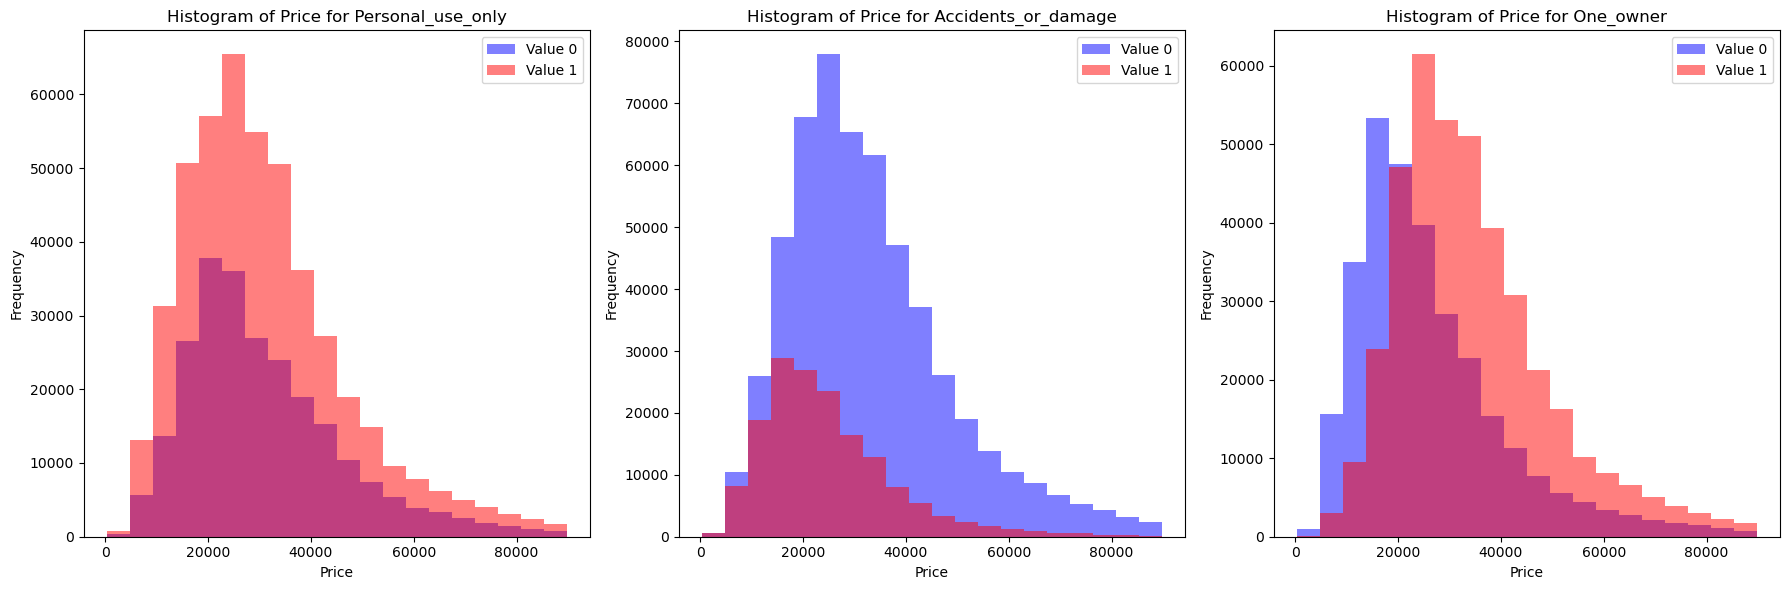

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## EDA for binary(0,1) features
#for display purpose, we only show price within 95 percentile
copy = data.copy()
price_95_percentile = np.percentile(data['price'], 98)
copy = copy[copy["price"] < price_95_percentile]
binary_columns = ["personal_use_only", "accidents_or_damage", "one_owner"]
fig, axes = plt.subplots(1, len(binary_columns), figsize=(18, 6))
for idx, column in enumerate(binary_columns):  
    # for value 0
    axes[idx].hist(copy[copy[column] == 0]['price'], alpha=0.5, color='blue', label='Value 0', bins=20)
    # for value 1
    axes[idx].hist(copy[copy[column] == 1]['price'], alpha=0.5, color='red', label='Value 1', bins=20)
    # graph styling
    axes[idx].set_xlabel('Price')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of Price for {column.capitalize()}')
    axes[idx].legend()
plt.tight_layout()
plt.show()

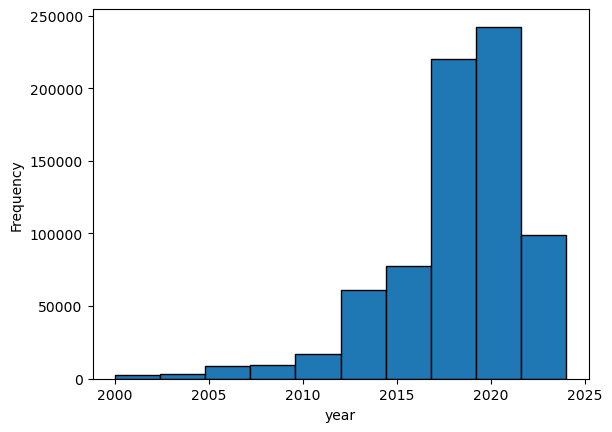

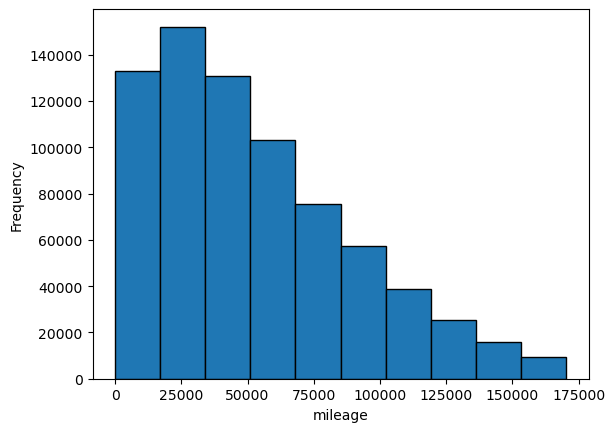

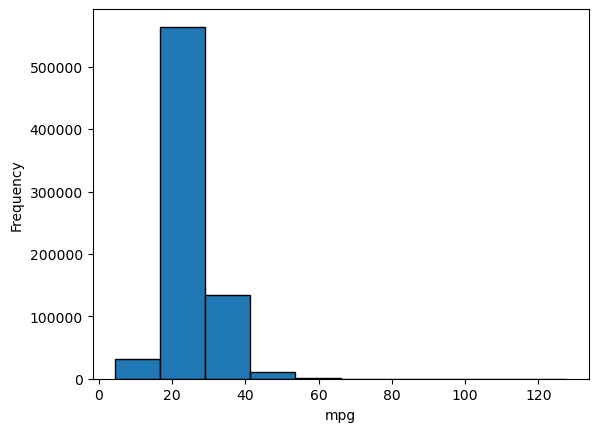

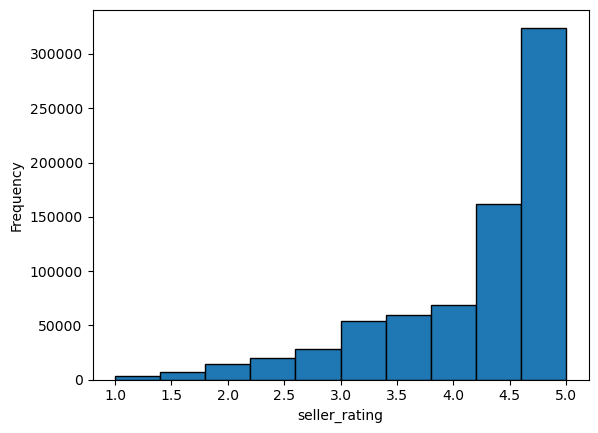

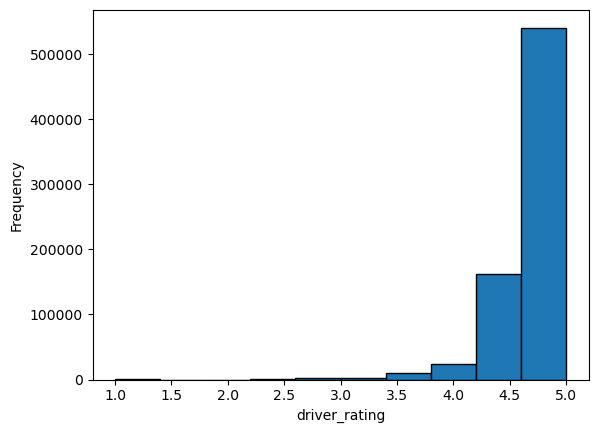

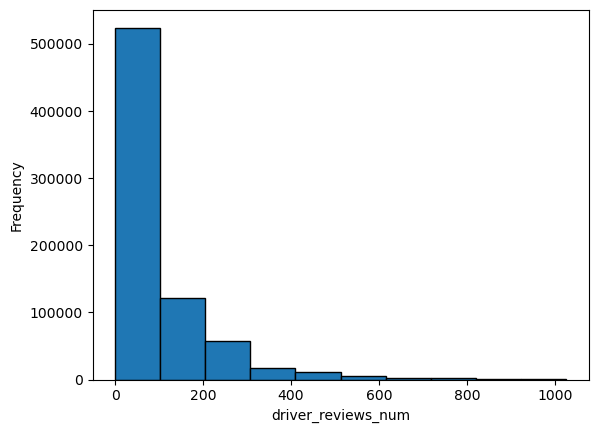

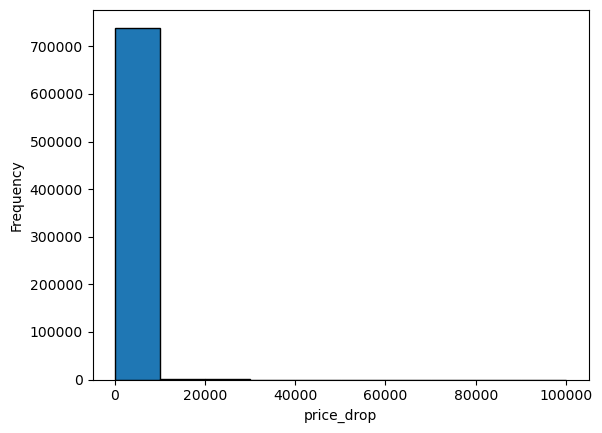

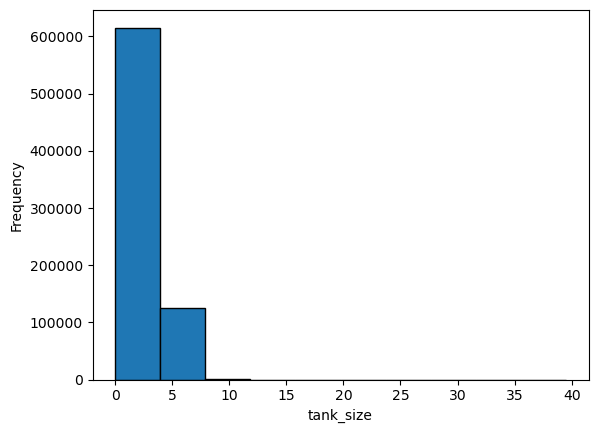

In [134]:
## distribution of numerical features
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.hist(data[col], edgecolor='black')
    plt.xlim(2000, 2024)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 

In [289]:
## eda for initial categorical features
data.nunique()

manufacturer                  30
model                      10774
year                          25
mileage                   145661
engine                      5431
transmission                 935
drivetrain                     5
fuel_type                      7
mpg                          152
exterior_color              6991
interior_color              4431
accidents_or_damage            2
one_owner                      2
personal_use_only              2
seller_rating                 41
driver_rating                 31
driver_reviews_num           369
price_drop                  6386
price                      62719
exterior_color_cleaned        11
transmission_cleaned           3
interior_color_cleaned        12
tank_size                     68
dtype: int64

## bivariate analysis

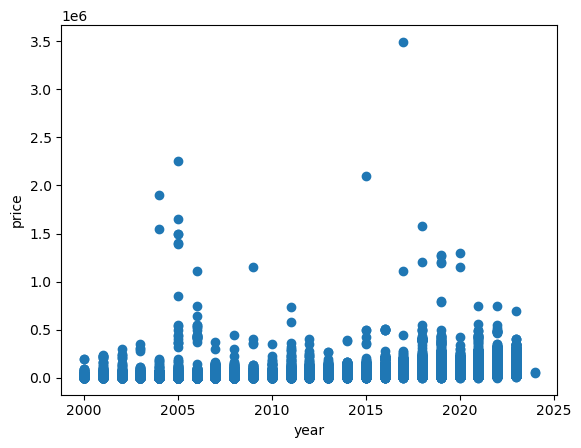

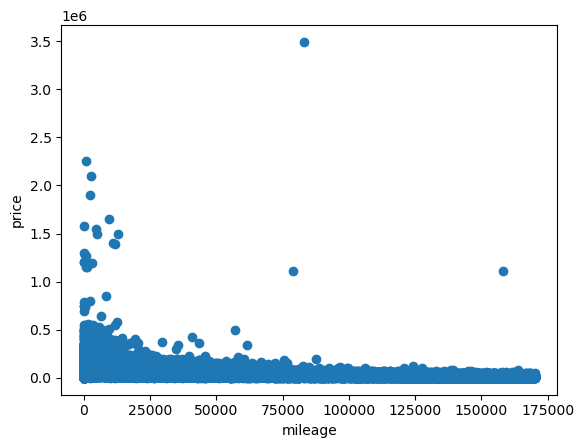

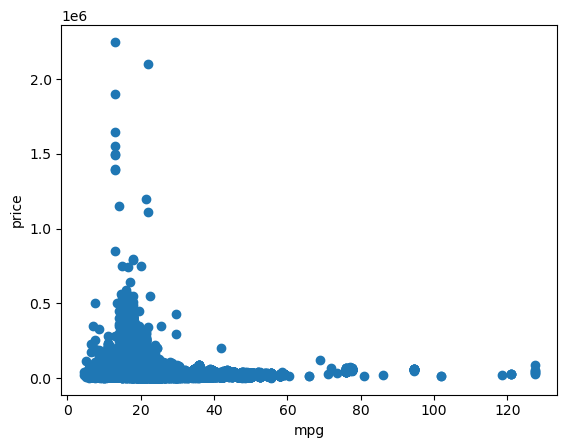

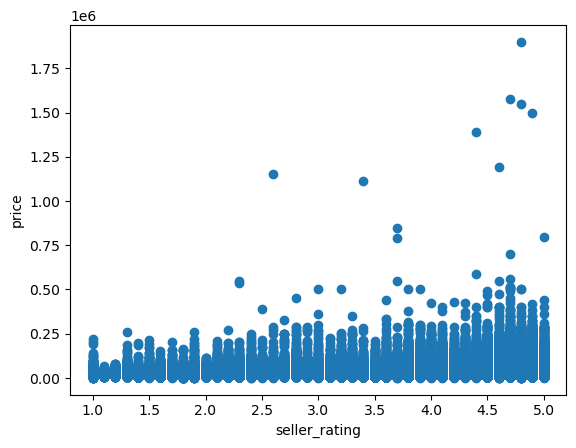

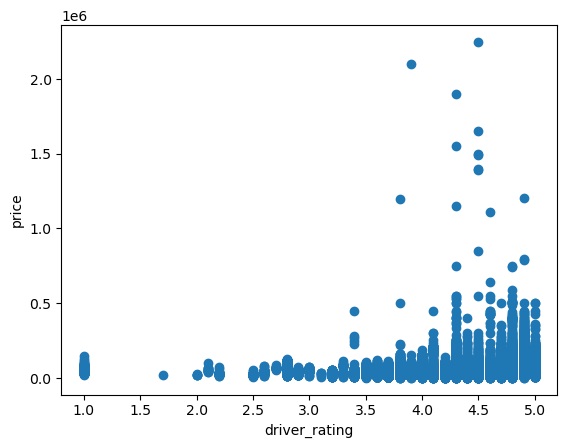

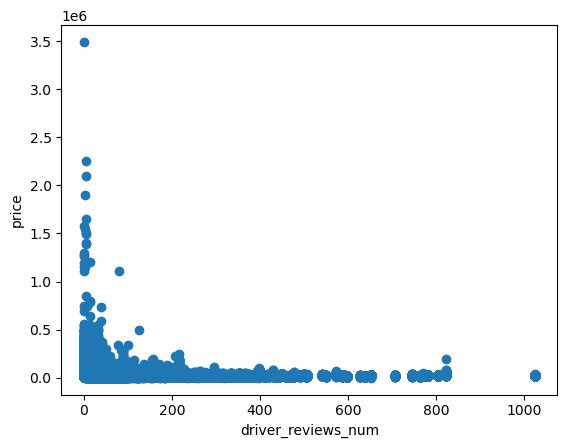

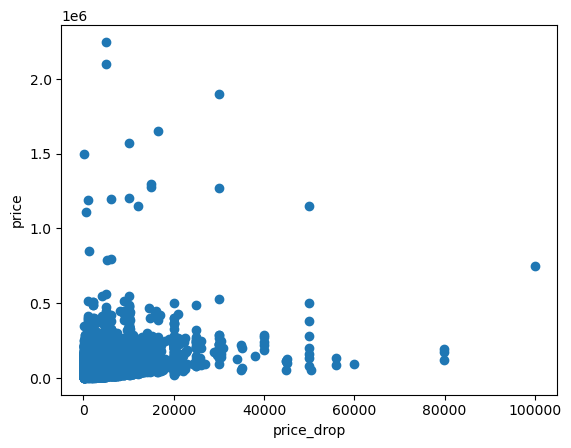

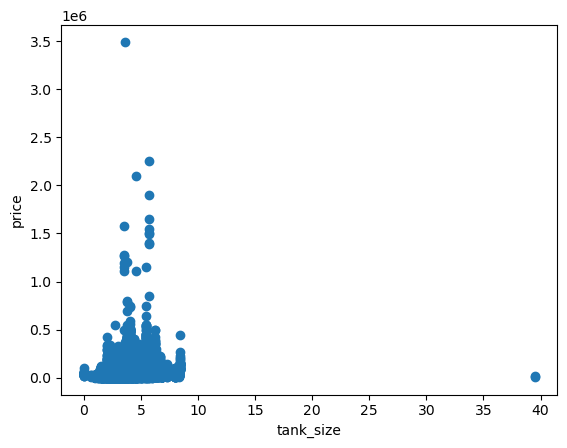

In [290]:
## EDA for relationship of numerical feature to price
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.scatter(x=data[col], y=data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show() 

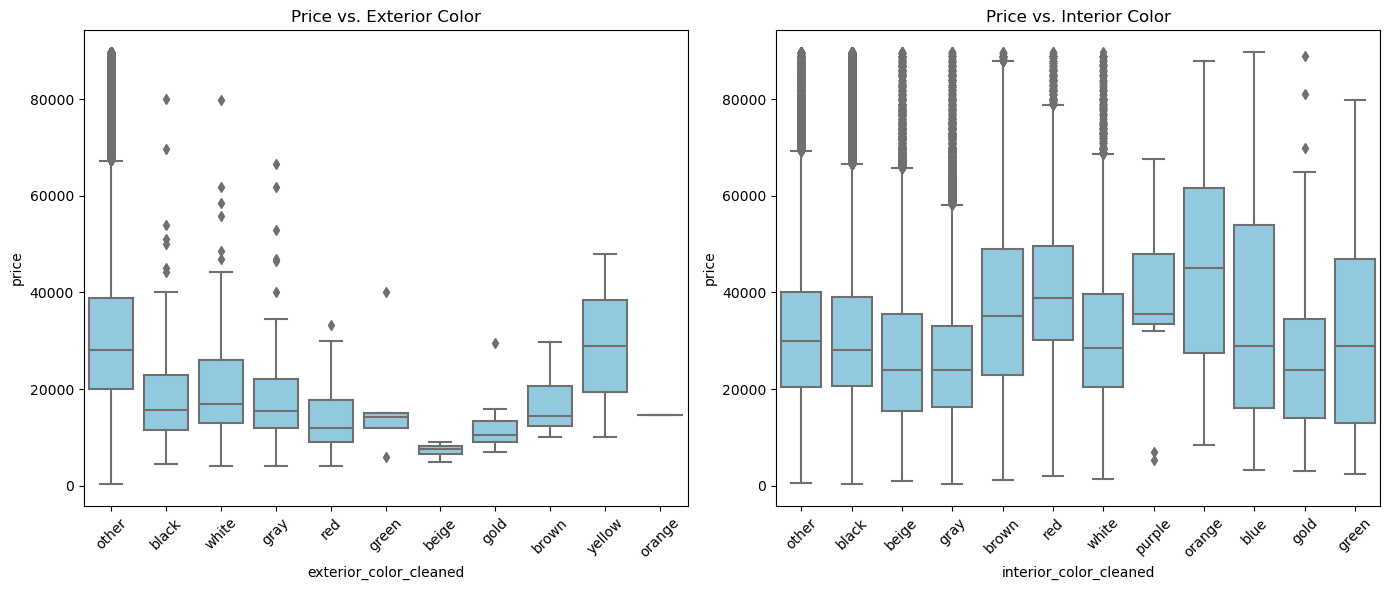

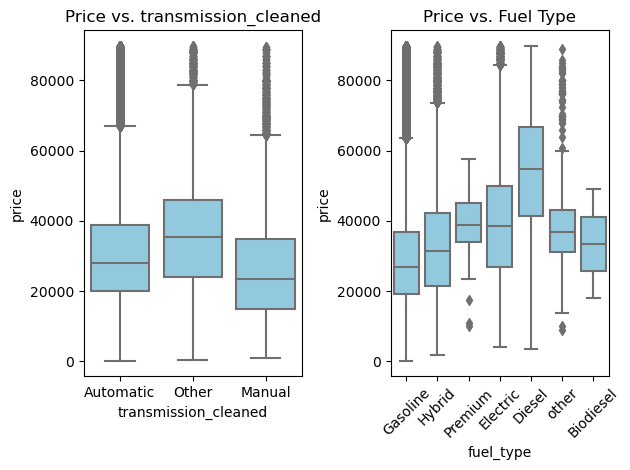

In [291]:
## EDA for categorical features to price
plt.figure(figsize=(14, 6)) 
plt.subplot(1, 2, 1)
sns.boxplot(data=copy, x='exterior_color_cleaned', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Exterior Color')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=copy, x='interior_color_cleaned', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Interior Color')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.subplot(1, 2, 1)
sns.boxplot(data=copy, x='transmission_cleaned', y='price',width=0.8,color='skyblue')
plt.title('Price vs. transmission_cleaned')

plt.subplot(1, 2, 2)

sns.boxplot(data=copy, x='fuel_type', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Fuel Type')
plt.xticks(rotation=45)

ticks = plt.gca().get_yticks()
plt.tight_layout()
plt.show()

## Multivariate Analysis

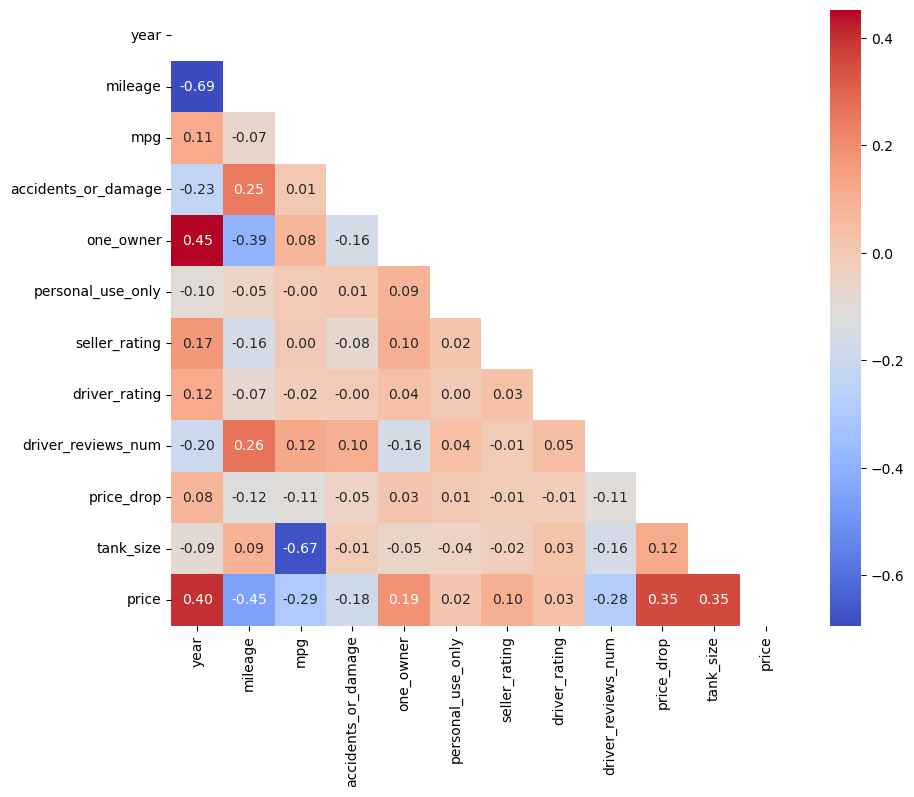

In [284]:
# correlation heatmap
copy = data.copy().drop(columns = ["price"])
copy["price"] = data["price"]
corr = copy.select_dtypes(['float', 'int']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Pre-Processing/Data Transformation

In [294]:
## create new features by taking the length of the description of the colors

exterior_color = data[["exterior_color"]]
# generate a column for the length of both 'exterior_color' and 'interior_color'
exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
# value is the length for non-null values, or 0 for null values
exterior_color = exterior_color["exterior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["exterior_color_length"] = exterior_color
interior_color = data[["interior_color"]]
# value is the length for non-null values, or 0 for null values
interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
interior_color = interior_color["interior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["interior_color_length"] = interior_color


/var/folders/bf/mf9fw9915q98qdc0k4pv6gnr0000gn/T/ipykernel_7426/3529904233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
/var/folders/bf/mf9fw9915q98qdc0k4pv6gnr0000gn/T/ipykernel_7426/3529904233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"


In [ ]:
## check what columns have null values

In [165]:
# imputation (by distribution)


In [168]:
# impute quantitative data by distribution

def quantitative_distribution(col, N):
    cleaned_col = col.dropna()
    hist, edges = np.histogram(cleaned_col, bins=10, density=True)
    bin_probs = hist * np.diff(edges)
    output = []
    for i in range(N):
        index = np.random.choice(range(10), p=bin_probs)
        bin_min, bin_max = edges[index], edges[index+1]
        output.append(np.random.uniform(bin_min, bin_max))
        # print(output)
    return np.array(output)

def impute_height_quant(col):
    missing = col.isnull()
    missing_idx = missing[missing].index

    imputed_values = quantitative_distribution(col.dropna(), missing.sum())
    output = col.copy()
    output.loc[missing_idx] = imputed_values
    return output

In [169]:
imputed_price_drop = impute_height_quant(data['price_drop'])
data['price_drop'] = imputed_price_drop

imputed_mpg = impute_height_quant(data['mpg'])
data['mpg'] = imputed_mpg

imputed_seller = impute_height_quant(data['seller_rating'])
data['seller_rating'] = imputed_seller

imputed_driver = impute_height_quant(data['driver_rating'])
data['driver_rating'] = imputed_driver

imputed_tank = impute_height_quant(data['tank_size'])
data['tank_size'] = imputed_tank

In [170]:
# create a column that calculates the time difference between now and 'year': the year when the car was produced
yearn = 2024 - data["year"]
data['year_from_2024'] = yearn
yearn

0         11
1         11
2         11
3         11
4         11
          ..
762086     2
762087    12
762088    10
762089    11
762090     9
Name: year, Length: 741009, dtype: int64

In [171]:
# label encoding on 'manufacturer', 'fuel_type'
data['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [172]:
# split 'engine' into different columns

In [173]:
data.isna().sum()
data["fuel_type"]

0         Gasoline
1           Hybrid
2           Hybrid
3           Hybrid
4           Hybrid
            ...   
762086    Gasoline
762087    Gasoline
762088    Gasoline
762089    Gasoline
762090    Gasoline
Name: fuel_type, Length: 741009, dtype: object

In [196]:
data.isna().sum()

manufacturer                  0
model                         0
year                          0
mileage                       0
engine                    14377
transmission                  0
drivetrain                    0
fuel_type                     0
mpg                           0
exterior_color             8284
interior_color            53961
accidents_or_damage           0
one_owner                     0
personal_use_only             0
seller_rating                 0
driver_rating                 0
driver_reviews_num            0
price_drop                    0
price                         0
exterior_color_cleaned        0
transmission_cleaned          0
interior_color_cleaned        0
tank_size                     0
exterior_color_length         0
interior_color_length         0
year_from_2024                0
dtype: int64

In [175]:
data_copy = data.copy()
def impute_with_probabilistic_distribution(column):
    # Get the non-missing values and their frequencies
    values, counts = np.unique(column.dropna(), return_counts=True)
    # Calculate probabilities for each value
    probabilities = counts / counts.sum()
    # Generate random values based on the distribution for the missing values
    imputed_values = np.random.choice(values, size=column.isna().sum(), p=probabilities)
    # Assign the generated values to the missing values
    column.loc[column.isna()] = imputed_values
    return column
data['fuel_type'] = impute_with_probabilistic_distribution(data_copy['fuel_type'])
data["personal_use_only"] = impute_with_probabilistic_distribution(data_copy['personal_use_only'])
data["accidents_or_damage"] = impute_with_probabilistic_distribution(data_copy['accidents_or_damage'])
data["one_owner"] = impute_with_probabilistic_distribution(data_copy['one_owner'])

/var/folders/bf/mf9fw9915q98qdc0k4pv6gnr0000gn/T/ipykernel_7426/2475188858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.isna()] = imputed_values


In [176]:
data.reset_index(drop = True, inplace = True)
# data = data.drop(columns = ['index'], axis = 1)
data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size,exterior_color_length,interior_color_length,year_from_2024
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front Wheel Drive,Gasoline,38.50000,Black,...,12.0,300.000000,13988.0,other,Automatic,other,1.5,1,1,11
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.50000,Gray,...,12.0,1368.841051,17995.0,other,Automatic,black,1.5,1,1,11
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.50000,Bellanova White Pearl,...,12.0,500.000000,17000.0,other,Automatic,black,1.5,3,1,11
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.50000,Polished Metal Metallic,...,12.0,675.000000,14958.0,other,Automatic,other,1.5,3,0,11
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.50000,NaN,...,12.0,300.000000,14498.0,other,Automatic,black,1.5,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741004,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All Wheel Drive,Gasoline,29.00000,Bright Silver Metallic,...,2.0,250.000000,34798.0,other,Automatic,other,2.0,3,1,2
741005,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front Wheel Drive,Gasoline,17.89712,Red,...,101.0,2057.591969,12500.0,other,Automatic,beige,2.5,1,1,12
741006,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front Wheel Drive,Gasoline,25.50000,Ice White,...,36.0,300.000000,12299.0,other,Automatic,beige,2.5,2,2,10
741007,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All Wheel Drive,Gasoline,24.50000,Ice White,...,62.0,1000.000000,8995.0,other,Automatic,black,2.5,2,2,11


In [177]:
from sklearn.preprocessing import OneHotEncoder

# Specify columns to encode
columns_to_encode = [
    'interior_color_cleaned', 
    'exterior_color_cleaned', 
    'transmission_cleaned', 
    'manufacturer', 
    'drivetrain', 
    'fuel_type',
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the data
# The drop='first' parameter is used to avoid the dummy variable trap by dropping one category per feature
encoded_data = encoder.fit_transform(data[columns_to_encode])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Drop the original columns from the cleaned dataframe and add the new one-hot encoded columns
cars_cleaned_df = data.drop(columns=columns_to_encode)
cars_encoded_df = pd.concat([cars_cleaned_df, encoded_df], axis=1)

cars_encoded_df


/Users/amily/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,model,year,mileage,engine,transmission,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,drivetrain_Four Wheel Drive,drivetrain_Front Wheel Drive,drivetrain_Other,drivetrain_Rear Wheel Drive,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Premium,fuel_type_other
0,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,38.50000,Black,Parchment,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Gray,Ebony,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Bellanova White Pearl,Ebony,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Polished Metal Metallic,NaN,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,NaN,Ebony,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741004,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,29.00000,Bright Silver Metallic,Blond,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741005,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,17.89712,Red,Beige,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741006,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,25.50000,Ice White,Soft Beige,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741007,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,24.50000,Ice White,Off Black,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Predictive Task

Identify a predictive task based on your dataset 
- Regression or classification?

Describe the task: 
- how to evaluate different predictive models (e.g. accuracy, f1); 
- what baseline models to compare with, why? 
- why our model(s) outperform them
Summary: compare various models


In [178]:
'''reset default pandas view in notebook output'''
# pd.reset_option('display.max_columns')
'''show all pandas columns in notebook output'''
pd.options.display.max_columns = None

In [179]:
cars_encoded_df

,model,year,mileage,engine,transmission,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,tank_size,exterior_color_length,interior_color_length,year_from_2024,interior_color_cleaned_black,interior_color_cleaned_blue,interior_color_cleaned_brown,interior_color_cleaned_gold,interior_color_cleaned_gray,interior_color_cleaned_green,interior_color_cleaned_orange,interior_color_cleaned_other,interior_color_cleaned_purple,interior_color_cleaned_red,interior_color_cleaned_white,exterior_color_cleaned_black,exterior_color_cleaned_brown,exterior_color_cleaned_gold,exterior_color_cleaned_gray,exterior_color_cleaned_green,exterior_color_cleaned_orange,exterior_color_cleaned_other,exterior_color_cleaned_red,exterior_color_cleaned_white,exterior_color_cleaned_yellow,transmission_cleaned_Manual,transmission_cleaned_Other,manufacturer_Audi,manufacturer_BMW,manufacturer_Buick,manufacturer_Cadillac,manufacturer_Chevrolet,manufacturer_Chrysler,manufacturer_Dodge,manufacturer_Ford,manufacturer_GMC,manufacturer_Honda,manufacturer_Hyundai,manufacturer_INFINITI,manufacturer_Jaguar,manufacturer_Jeep,manufacturer_Kia,manufacturer_Land Rover,manufacturer_Lexus,manufacturer_Lincoln,manufacturer_Mazda,manufacturer_Mercedes-Benz,manufacturer_Mitsubishi,manufacturer_Nissan,manufacturer_Porsche,manufacturer_RAM,manufacturer_Subaru,manufacturer_Tesla,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo,drivetrain_Four Wheel Drive,drivetrain_Front Wheel Drive,drivetrain_Other,drivetrain_Rear Wheel Drive,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Premium,fuel_type_other
0,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,38.50000,Black,Parchment,0.0,0.0,0.0,4.523196,4.4,12.0,300.000000,13988.0,1.5,1,1,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Gray,Ebony,1.0,1.0,1.0,4.742347,4.4,12.0,1368.841051,17995.0,1.5,1,1,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Bellanova White Pearl,Ebony,0.0,1.0,1.0,4.300000,4.4,12.0,500.000000,17000.0,1.5,3,1,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,Polished Metal Metallic,NaN,0.0,1.0,1.0,2.895218,4.4,12.0,675.000000,14958.0,1.5,3,0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.50000,NaN,Ebony,1.0,0.0,1.0,3.700000,4.4,12.0,300.000000,14498.0,1.5,0,1,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [180]:
cars_encoded_df.isnull().mean()[cars_encoded_df.isnull().mean() != 0]

engine            0.019402
exterior_color    0.011179
interior_color    0.072821
dtype: float64

In [181]:
X = cars_encoded_df.drop(columns=['engine', 'model', 'transmission', 'exterior_color', 'interior_color', 'price'], axis = 1)
Y = cars_encoded_df["price"]

In [182]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y, test_size=0.4,random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [189]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit Lasso regression model
lasso = Lasso(alpha=0.2)  # Set regularization parameter alpha
lasso.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients = lasso.coef_

# Identify important features
selected_features = X_train.columns[coefficients != 0]


/Users/amily/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+13, tolerance: 2.511e+10
  model = cd_fast.enet_coordinate_descent(


In [190]:
set(X_train.columns) - set(selected_features)

{'exterior_color_cleaned_other'}

In [131]:
# baseline model: median and linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
regr = LinearRegression(fit_intercept = False)
regr.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, regr.predict(X_train))) #rmse
eval_accuracy = math.sqrt(mean_squared_error(y_eval, regr.predict(X_eval))) #rmse
{"train": train_accuracy,
"eval": eval_accuracy}
#{'train': 16464.188037542066, 'eval': 17460.32120326707}

{'train': 16756.467628508468, 'eval': 15816.576546083008}

In [132]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1,fit_intercept=False)
clf.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, clf.predict(X_train))) #rmse
eval_accuracy = math.sqrt(mean_squared_error(y_eval, clf.predict(X_eval))) #rmse
{"train": train_accuracy,
"eval": eval_accuracy}
#{'train': 16464.195073797175, 'eval': 17460.28464214001}

{'train': 16756.490990481238, 'eval': 15816.551733849059}

In [133]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=1,fit_intercept=False)
lasso.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, lasso.predict(X_train))) #rmse
eval_accuracy = math.sqrt(mean_squared_error(y_eval, lasso.predict(X_eval))) #rmse
{"train": train_accuracy,
"eval": eval_accuracy}
#{'train': 16466.09154841086, 'eval': 17462.623553560374}

KeyboardInterrupt: 

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(max_depth = 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300)
# rf.fit(X_train, y_train)
# train_accuracy = math.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
# eval_accuracy = math.sqrt(mean_squared_error(y_eval, rf.predict(X_eval)))
# {"train": train_accuracy,
# "eval": eval_accuracy}

# #record: {'train': 10584.224361473895, 'eval': 12317.072019182724}

In [253]:
from sklearn import ensemble
import math

hisgrad = ensemble.HistGradientBoostingRegressor(loss="squared_error",
    learning_rate=0.2,
    max_iter=300,
    max_leaf_nodes=30,
    max_depth= 7,
    min_samples_leaf=20,
                                                 random_state = 42
                                                 
)
hisgrad.fit(X_train, y_train)

train_accuracy = math.sqrt(mean_squared_error(y_train, hisgrad.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, hisgrad.predict(X_eval)))
{"train": train_accuracy,
"eval": eval_accuracy}

# record no hyper {'train': 10137.73629982562, 'eval': 11424.102402840252}
# record with hyper {'train': 9663.34316478846, 'eval': 11228.123989381353}

{'train': 9146.018723693562, 'eval': 9385.070885699592}

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Calculate cross-validated RMSE scores
scores = cross_val_score(hisgrad, X_train, y_train, cv=5, scoring=rmse_scorer, n_jobs=5)

# Since the scores are negative, take the absolute value to get the actual RMSE scores
rmse_scores = np.abs(scores)

print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

RMSE scores: [15109.02614057 10954.90245843 10066.82290194  8535.76703037
  9324.29326737]
Mean RMSE: 10798.162359738728


In [ ]:
RMSE scores: [15109.02614057 10954.90245843 10066.82290194  8535.76703037
  9324.29326737]
Mean RMSE: 10798.162359738728
    
    
    

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
regressor = HistGradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parametersloss="squared_error",
best_params = grid_search.best_params_
print("Best parameters:", best_params)
#Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 300, 'min_samples_leaf': 30}






/Users/amily/anaconda3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 300, 'min_samples_leaf': 30}


In [ ]:
%pip install xgboost

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [248]:
import xgboost as xgb
import xgboost as XGBRegressor
xgb = xgb.XGBRegressor(learning_rate = 0.1,n_estimators = 300, max_depth = 5,min_child_weight =5, subsample=0.8,colsample_bytree = 0.7)
xgb.fit(X_train, y_train,verbose = False)
train_accuracy = math.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, xgb.predict(X_eval)))
#test_accuracy = math.sqrt(mean_squared_error(y_test, xgb.predict(test)))
{"train": train_accuracy,
"eval": eval_accuracy}
#{'train': 9523.586946694777, 'eval': 10816.02897731176}

{'train': 9013.264220977342, 'eval': 9354.059562922854}

In [264]:
features = {}
index = 0
x = xgb.feature_importances_
for i in X_train.columns:
    features[i] = x[index]
    index += 1
dict(sorted(features.items(), key=lambda item: item[1]))

{'interior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_black': 0.0,
 'exterior_color_cleaned_brown': 0.0,
 'exterior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_gray': 0.0,
 'exterior_color_cleaned_green': 0.0,
 'exterior_color_cleaned_orange': 0.0,
 'exterior_color_cleaned_other': 0.0,
 'exterior_color_cleaned_red': 0.0,
 'exterior_color_cleaned_yellow': 0.0,
 'fuel_type_Premium': 0.0,
 'exterior_color_cleaned_white': 0.00033707469,
 'interior_color_cleaned_purple': 0.00058429386,
 'manufacturer_Jaguar': 0.001532637,
 'interior_color_cleaned_orange': 0.0019631106,
 'manufacturer_Buick': 0.0019983042,
 'interior_color_cleaned_green': 0.002020531,
 'manufacturer_Mazda': 0.0021703546,
 'interior_color_cleaned_blue': 0.0023026369,
 'interior_color_cleaned_white': 0.0025191174,
 'fuel_type_other': 0.0025751265,
 'manufacturer_Chrysler': 0.0027128726,
 'exterior_color_length': 0.0029273774,
 'manufacturer_Jeep': 0.002933174,
 'interior_color_cleaned_black': 0.0030682953,
 'tra

In [272]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=0)
perm_importance['importances_mean']

array([ 2.85781978e-01,  2.77815243e-01,  5.99999425e-02,  2.63034705e-03,
        1.52794290e-03,  9.15137378e-04, -6.46675202e-04,  9.87604899e-03,
        1.07329219e-01,  8.09073263e-03,  2.12114732e-01,  6.88985191e-04,
        1.31810654e-03,  2.63997306e-02,  3.75616936e-04,  4.64255812e-04,
        3.24625302e-04,  0.00000000e+00,  8.29371100e-04,  2.19727434e-06,
        6.18167494e-05, -3.66833877e-05,  1.25930794e-06,  1.35363873e-03,
        4.82610243e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.10005233e-07,  0.00000000e+00,  3.24936475e-03,
        5.08254427e-04,  1.44816533e-02,  9.63383634e-03,  2.95980738e-04,
        6.44649804e-03,  1.38111818e-03,  8.84707659e-04,  2.34579769e-03,
        4.45935178e-03,  2.98154062e-03,  7.92440015e-04,  1.32480431e-03,
        3.99835036e-04,  3.37565438e-04,  7.89877856e-04,  2.36384390e-03,
        1.94148512e-02,  

In [273]:
features = {}
index = 0
x = perm_importance['importances_mean']
for i in X_train.columns:
    features[i] = x[index]
    index += 1
dict(sorted(features.items(), key=lambda item: item[1]))

{'seller_rating': -0.0006466752022789679,
 'interior_color_cleaned_other': -3.668338771141144e-05,
 'exterior_color_cleaned_white': -4.100052326316828e-07,
 'interior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_black': 0.0,
 'exterior_color_cleaned_brown': 0.0,
 'exterior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_gray': 0.0,
 'exterior_color_cleaned_green': 0.0,
 'exterior_color_cleaned_orange': 0.0,
 'exterior_color_cleaned_other': 0.0,
 'exterior_color_cleaned_red': 0.0,
 'exterior_color_cleaned_yellow': 0.0,
 'fuel_type_Premium': 0.0,
 'interior_color_cleaned_purple': 1.2593079445788468e-06,
 'interior_color_cleaned_green': 2.1972743368126046e-06,
 'fuel_type_other': 1.3618945538507177e-05,
 'interior_color_cleaned_white': 4.826102429551504e-05,
 'interior_color_cleaned_orange': 6.181674940263227e-05,
 'manufacturer_Buick': 0.00029598073769726563,
 'interior_color_cleaned_brown': 0.00032462530168628765,
 'manufacturer_Jaguar': 0.0003375654377148152,
 'interior_color_

In [267]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 8.7 MB/s eta 0:00:00:00:01
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


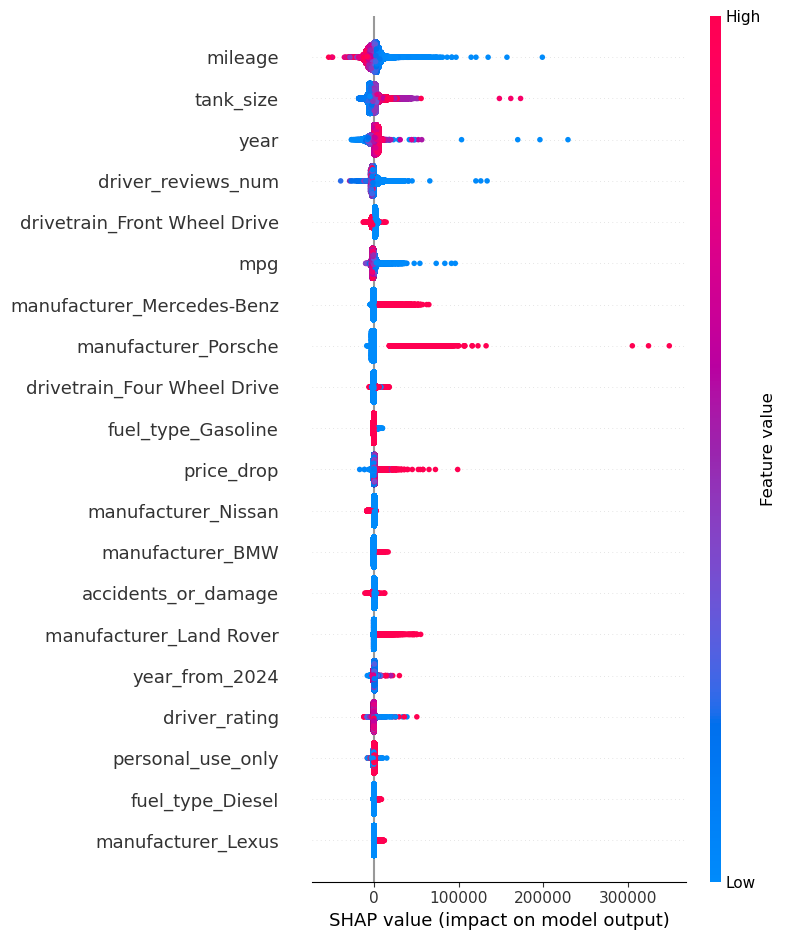

In [268]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Calculate cross-validated RMSE scores
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring=rmse_scorer, n_jobs=5)

# Since the scores are negative, take the absolute value to get the actual RMSE scores
rmse_scores = np.abs(scores)

print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
#RMSE scores: [14556.03927004  8311.76443924 10387.75637621  8269.93050288, 10311.52328243]
#Mean RMSE: 10367.40277416037

RMSE scores: [15296.05699241 10715.08588854 10517.47473283  9009.80013718
  9181.93796135]
Mean RMSE: 10944.071142464427


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
#'colsample_bytree': 0.7,
# 'learning_rate': 0.1,
# 'max_depth': 7,
# 'n_estimators': 300

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Mean Squared Error: 72380213.45519246


In [ ]:
hisgrad.predict(X_train)


array([27249.08609382, 31321.08062067, 32948.8278272 , ...,
       42797.63240944, 55387.72300062, 33188.53337583])

In [ ]:
y_train

45986     25336.0
187451    19993.0
614865    26999.0
700168    45747.0
358050    46033.0
           ...   
200211    41850.0
137031    29999.0
666892    42381.0
114369    45408.0
473253    26659.0
Name: price, Length: 444605, dtype: float64

## Model

## Conclusion